In [1]:
# Part 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [ ]:
# Part 2: Load the Dataset
df = pd.read_csv('winequality.csv')  # Make sure the CSV file is in the same directory


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [3]:
# Part 3: Checking for Null Values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [4]:
# Part 4: Handle Missing Values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
# We are filling the empty columns as na if incase there are any in the dataset which we have choosen

In [5]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [6]:
# Part 5: Drop Highly Correlated Features
df = df.drop('total sulfur dioxide', axis=1)

In [7]:
# Part 6: Create a Binary Target Variable
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [8]:
# Part 7: Prepare Features and Target Variable
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

In [9]:
# Part 8: Split the Dataset
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

In [10]:
# Part 9: Impute Missing Values After Splitting
imputer = SimpleImputer(strategy='mean')
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

In [11]:
# Part 10: Normalize the Data
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [12]:
# Part 11: Train Models
models = [LogisticRegression()]
for model in models:
    model.fit(xtrain, ytrain)
    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, model.predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, model.predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7536725610489595
Validation Accuracy :  0.7255154639175256



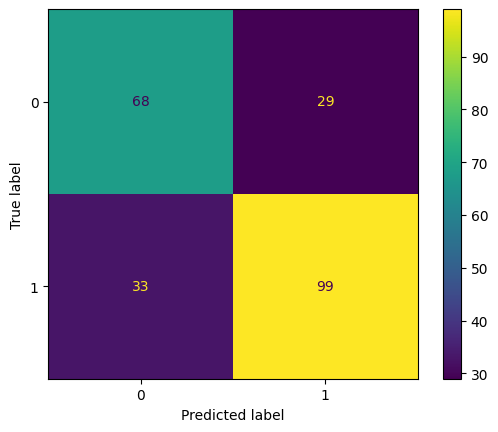

              precision    recall  f1-score   support

           0       0.67      0.70      0.69        97
           1       0.77      0.75      0.76       132

    accuracy                           0.73       229
   macro avg       0.72      0.73      0.72       229
weighted avg       0.73      0.73      0.73       229



In [13]:
# Part 12: Model Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming the Logistic Regression model is the best
cm = confusion_matrix(ytest, models[0].predict(xtest))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[0].classes_)
disp.plot()
plt.show()

# Print classification report
print(metrics.classification_report(ytest, models[0].predict(xtest)))